# Adult Income Analysis And Prediction

## Step: 1

## Business Problem
- Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Step: 2

## Attribute Information

The dataset contains various attributes related to an individual's demographic and employment details. Below is a detailed description of each attribute:

- **age** (Continuous): Age of the individual.  
- **workclass** (Categorical): Type of employer (e.g., Private, Self-emp, Government, etc.).  
- **fnlwgt** (Continuous): Final weight assigned to an observation in the dataset.  
- **education** (Categorical): Education level (e.g., Bachelors, Masters, Doctorate, etc.).  
- **education-num** (Continuous): Numerical representation of education level.  
- **marital-status** (Categorical): Marital status (e.g., Married, Never-married, Divorced, etc.).  
- **occupation** (Categorical): Type of occupation (e.g., Tech-support, Sales, Executive, etc.).  
- **relationship** (Categorical): Relationship status within the household (e.g., Husband, Wife, Own-child, etc.).  
- **race** (Categorical): Race of the individual (e.g., White, Black, Asian-Pac-Islander, etc.).  
- **sex** (Categorical): Gender (Male/Female).  
- **capital-gain** (Continuous): Capital gain (income from investments).  
- **capital-loss** (Continuous): Capital loss (loss from investments).  
- **hours-per-week** (Continuous): Average number of work hours per week.  
- **native-country** (Categorical): Country of origin of the individual.  

### Target Variable:
- **income** (Binary): Whether an individual's annual income is `<=50K` or `>50K`.  

This dataset is commonly used for **income classification** based on demographic and work-related attributes.


## Step 3: Import the data and Analyse the Data

In [7]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv(r"C:\Users\sunil\DK\DK Data Science\JYPITER FILE\Adult Salary prediction\adult.csv")
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## as from the Atrribute information we know that columns are Age, Workclass, Fnlwgt (we dont need), Education, Mairatial sts, occupation, relationship sts, Race, Sex, Ca[ital gain, capital loss, country, and income level( >=50k or <=50k). These are coloumn required based on our requirment lets rename the column.for better understand

In [10]:
# Dictionary of new column names with index positions
new_column_names = {
    0: "Age",
    1: "Work_Class",
    2: "fnlwgt",
    3: "Education",
    4: "Education_digit",
    5: "Marital_status",
    6: "Occupation",
    7: "Relation_Family",
    8: "Race",
    9: "Sex",
    10: "Capital_gain",
    11: "Capital_loss",
    12: "Work_Hr_week",
    13: "Country",
    14: "Salary"
}

# Rename columns using a loop
for index, new_name in new_column_names.items():
    data.columns.values[index] = new_name

# Display updated column names
print(data.columns)



Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'Education_digit',
       'Marital_status', 'Occupation', 'Relation_Family', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Work_Hr_week', 'Country', 'Salary'],
      dtype='object')


In [11]:
data.head()

,Age,Work_Class,fnlwgt,Education,Education_digit,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
data.columns


Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'Education_digit',
       'Marital_status', 'Occupation', 'Relation_Family', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Work_Hr_week', 'Country', 'Salary'],
      dtype='object')

In [13]:
# as we dont need the column of fnlwgt and education degit lets drop it
data.columns = data.columns.str.strip()  # Remove hidden spaces
data.drop(columns=["fnlwgt", "Education_digit"], inplace=True)

data.columns

Index(['Age', 'Work_Class', 'Education', 'Marital_status', 'Occupation',
       'Relation_Family', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Work_Hr_week', 'Country', 'Salary'],
      dtype='object')

In [14]:
data.head()

,Age,Work_Class,Education,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country,Salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Step 4: Lets check The missing velues

In [16]:
data.isnull().sum()  # Check missing values in each column


Age                0
Work_Class         0
Education          0
Marital_status     0
Occupation         0
Relation_Family    0
Race               0
Sex                0
Capital_gain       0
Capital_loss       0
Work_Hr_week       0
Country            0
Salary             0
dtype: int64

### As there No missing value so we Dont required to do any operation on missing value

In [18]:
data.describe().T # detailed explanation on numerical data

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Work_Hr_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   Work_Class       32560 non-null  object
 2   Education        32560 non-null  object
 3   Marital_status   32560 non-null  object
 4   Occupation       32560 non-null  object
 5   Relation_Family  32560 non-null  object
 6   Race             32560 non-null  object
 7   Sex              32560 non-null  object
 8   Capital_gain     32560 non-null  int64 
 9   Capital_loss     32560 non-null  int64 
 10  Work_Hr_week     32560 non-null  int64 
 11  Country          32560 non-null  object
 12  Salary           32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [20]:
# From the above information there are 4 integer attribute and 9 categirical attribute

## Step 5: Some Analysis visuals

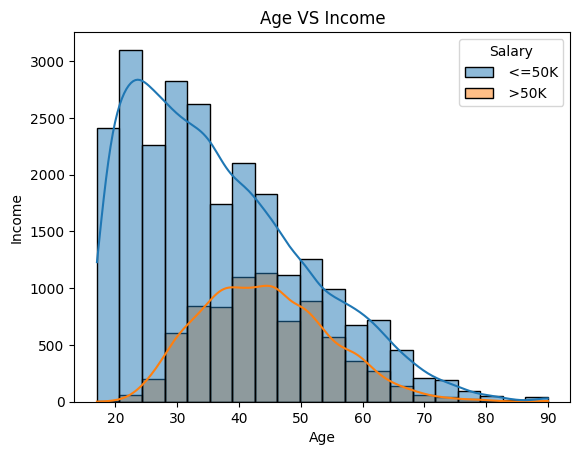

In [22]:
#1. How does age distribution vary across income levels (<=50K vs >50K)?

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data, x="Age", hue="Salary", kde=True, bins=20)
plt.title("Age VS Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


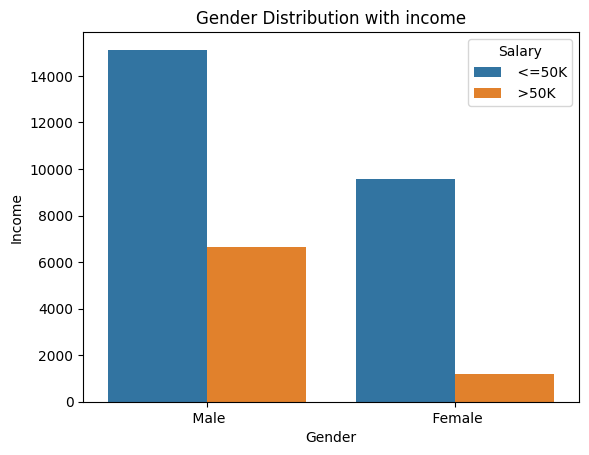

In [23]:
# 2. What is the gender distribution for different income levels?

sns.countplot(data,x="Sex",hue="Salary")
plt.title("Gender Distribution with income")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()

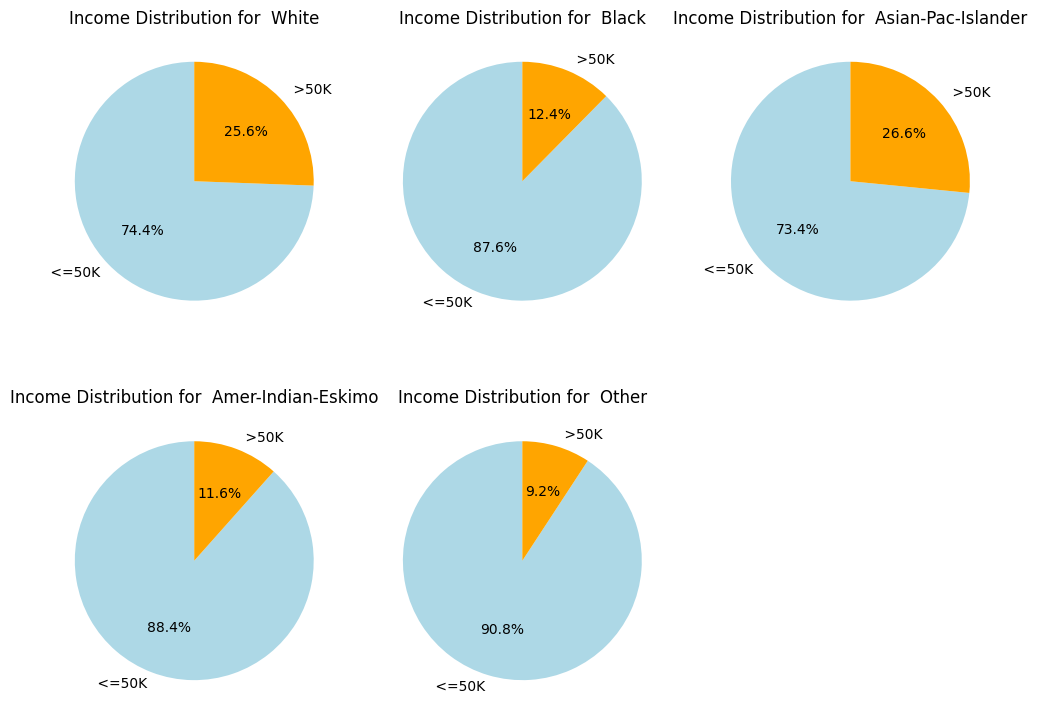

In [24]:
#4. Which races have the highest percentage of people earning >50K?

# Get unique race categories
races = data["Race"].unique()

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))  # Adjust grid size based on the number of races
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each race and plot a pie chart
for i, race in enumerate(races):
    race_data = data[data["Race"] == race]["Salary"].value_counts()
    axes[i].pie(race_data, labels=race_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
    axes[i].set_title(f"Income Distribution for {race}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

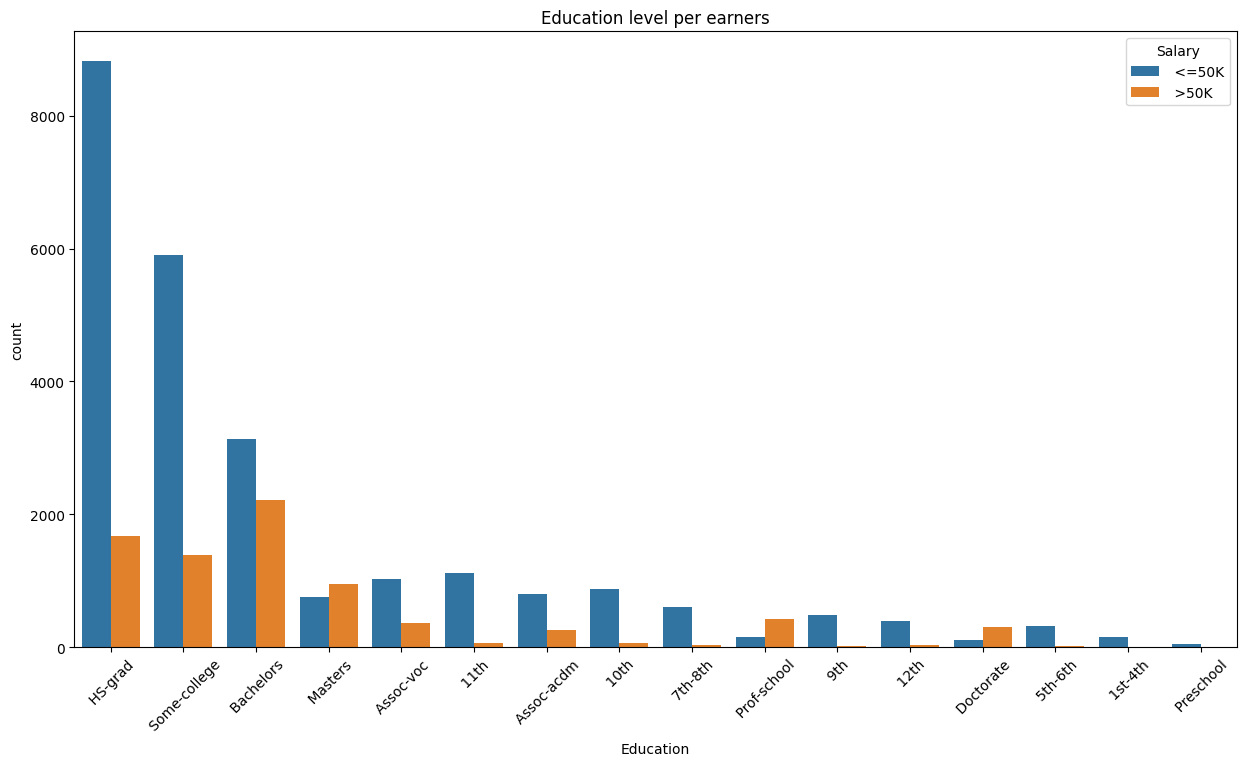

In [25]:
#5. What are the most common education levels among high earners (>50K)?

plt.figure(figsize=(15, 8))
sns.countplot(x="Education", hue="Salary", data=data, order=data["Education"].value_counts().index)
plt.title("Education level per earners")
plt.xticks(rotation=45)
plt.show()

In [26]:
work_class_salary_counts = data.groupby(["Work_Class", "Salary"]).size().reset_index(name="Count")
work_class_salary_counts


,Work_Class,Salary,Count
0,?,<=50K,1645
1,?,>50K,191
2,Federal-gov,<=50K,589
3,Federal-gov,>50K,371
4,Local-gov,<=50K,1476
5,Local-gov,>50K,617
6,Never-worked,<=50K,7
7,Private,<=50K,17733
8,Private,>50K,4963
9,Self-emp-inc,<=50K,494


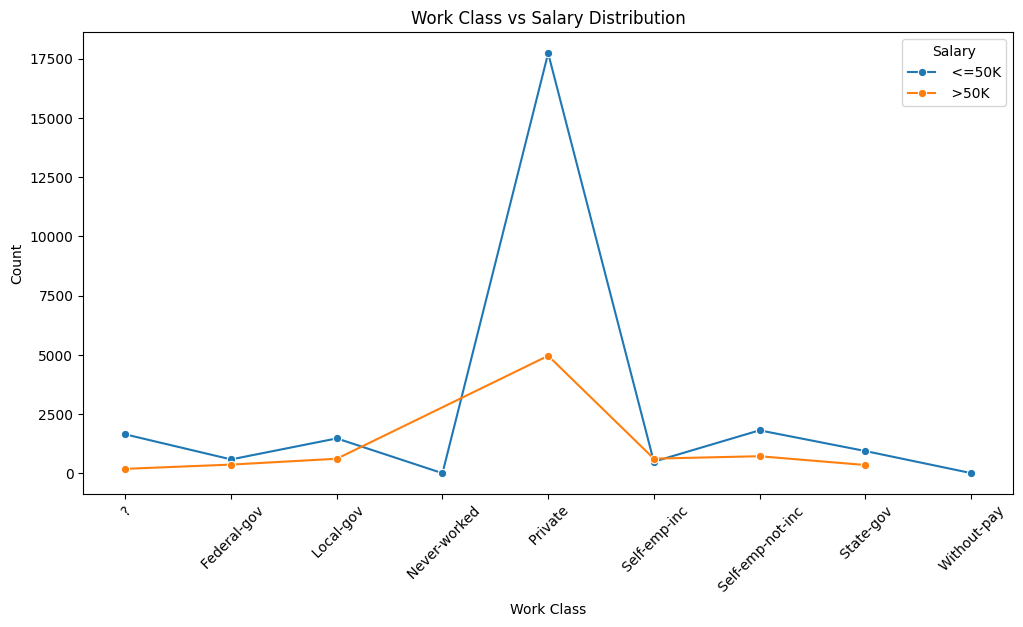

In [27]:
# 6. Which work classes have the highest income levels?

# Group by Work_Class and Salary, then count occurrences
work_class_salary_counts = data.groupby(["Work_Class", "Salary"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
# Create line plot
sns.lineplot(x="Work_Class", y="Count", hue="Salary", data=work_class_salary_counts, marker="o")

plt.xlabel("Work Class")
plt.ylabel("Count")
plt.title("Work Class vs Salary Distribution")
plt.xticks(rotation=45)  # Rotate for better readability

plt.show()

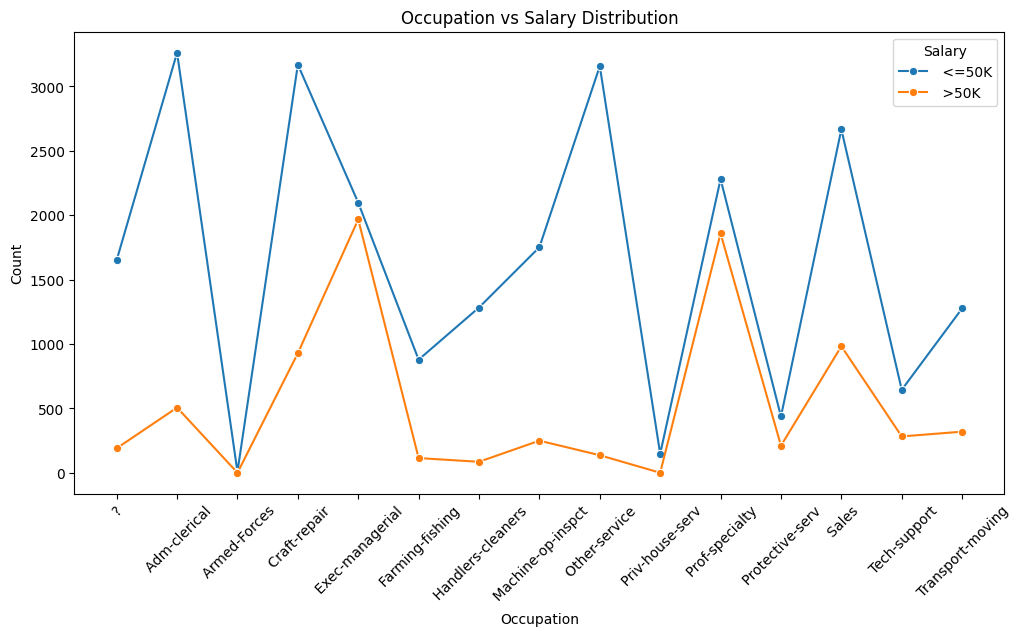

In [28]:
# 7. Which occupations are most likely to earn >50K?

plt.figure(figsize=(12, 6))

# Group by Occupation and Salary, then count occurrences
occupation_salary_counts = data.groupby(["Occupation", "Salary"]).size().reset_index(name="Count")

# Create line plot with hue for Salary
sns.lineplot(x="Occupation", y="Count", hue="Salary", data=occupation_salary_counts, marker="o")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation vs Salary Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [29]:
# 8. Which countries have the highest percentage of people earning >50K?
country_salary_counts = pd.crosstab(data['Country'], data['Salary'])
print(country_salary_counts)

Salary                      <=50K  >50K
Country                                
?                             437   146
Cambodia                       12     7
Canada                         82    39
China                          55    20
Columbia                       57     2
Cuba                           70    25
Dominican-Republic             68     2
Ecuador                        24     4
El-Salvador                    97     9
England                        60    30
France                         17    12
Germany                        93    44
Greece                         21     8
Guatemala                      61     3
Haiti                          40     4
Holand-Netherlands              1     0
Honduras                       12     1
Hong                           14     6
Hungary                        10     3
India                          60    40
Iran                           25    18
Ireland                        19     5
Italy                          48    25


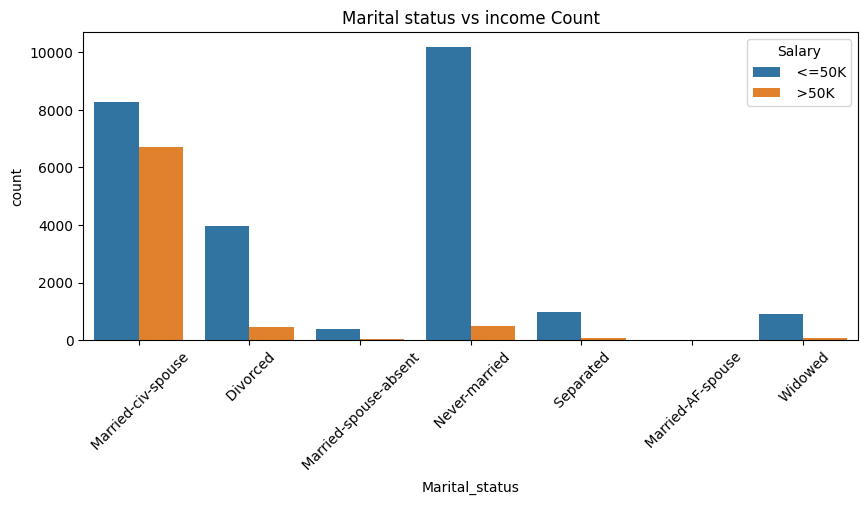

In [30]:
# 9. Is there a relationship between marital status and income?
plt.figure(figsize=(10,4))
sns.countplot(x="Marital_status", hue="Salary", data=data)
plt.title("Marital status vs income Count")
plt.xticks(rotation=45)
plt.show()

## Visualisation complete

In [32]:
# Lets do ML

In [33]:
data.head()

,Age,Work_Class,Education,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country,Salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Step 6: Encode the categorical varibale to numerical

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ["Work_Class", "Education", "Marital_status", "Occupation", 
                    "Relation_Family", "Race", "Sex", "Country", "Salary"]

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])  # Convert to numeric


In [36]:
data.head()

,Age,Work_Class,Education,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country,Salary
0,50,6,9,2,4,0,4,1,0,0,13,39,0
1,38,4,11,0,6,1,4,1,0,0,40,39,0
2,53,4,1,2,6,0,2,1,0,0,40,39,0
3,28,4,9,2,10,5,2,0,0,0,40,5,0
4,37,4,12,2,4,5,4,0,0,0,40,39,0


## Step 7: dependent and independent variable

In [38]:
X = data.drop(columns=["Salary"])  # Features
y = data["Salary"]  # Target variable
X.head()

,Age,Work_Class,Education,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country
0,50,6,9,2,4,0,4,1,0,0,13,39
1,38,4,11,0,6,1,4,1,0,0,40,39
2,53,4,1,2,6,0,2,1,0,0,40,39
3,28,4,9,2,10,5,2,0,0,0,40,5
4,37,4,12,2,4,5,4,0,0,0,40,39


## Step 8: Split the data to Train and Test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Step 9: Scale the data for better accuracy

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


## Step 8: Implement ML model

### Model 1 (Random Forest)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = RandomForestClassifier(n_estimators=300,criterion="entropy")


In [46]:


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(f"Model Accuracy: {rf_accuracy * 100:.2f}%")
print(f" Confusion metrics: {cm}")

Model Accuracy: 85.33%
 Confusion metrics: [[4607  350]
 [ 605  950]]


### Model 2 (Light GBM)

In [48]:
import lightgbm as lgb

# Train the model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train,y_train)

y_pred = lgbm_model.predict(X_test)


# Calculate Accuracy
lgbm_accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Model Accuracy: {(lgbm_accuracy*100):.2f}")

[LightGBM] [Info] Number of positive: 6286, number of negative: 19762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241324 -> initscore=-1.145436
[LightGBM] [Info] Start training from score -1.145436
LightGBM Model Accuracy: 87.19


### Model 3 (Logistic Regression)

In [50]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()

In [51]:
logit.fit(X_train,y_train)

y_pred=logit.predict(X_test)

logit_accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {(logit_accuracy*100): .2f}")

Model Accuracy:  80.28


### Model 4 (Decision Tree)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {dt_accuracy*100:.2f}%")


Decision Tree Model Accuracy: 81.63%


### Model 5 (SVC)

In [55]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()  
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy*100:.2f}%")


SVM Model Accuracy: 82.28%


### Model 6 (KNN)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default neighbors = 5
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {knn_accuracy*100:.2f}%")


KNN Model Accuracy: 82.88%


### Model 7 (XGBOOST)

In [59]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy*100:.2f}%")


XGBoost Model Accuracy: 87.27%


### Model 8 (CATBOOST)

In [61]:
import catboost as cb

# Train CatBoost model
cat_model = cb.CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Accuracy
cat_accuracy = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Model Accuracy: {cat_accuracy*100:.2f}%")


CatBoost Model Accuracy: 87.41%


## Step 9: Choose the model

           Model  Accuracy
4       CatBoost  0.874079
3        XGBoost  0.872697
5       LightGBM  0.871929
7  Random_forest  0.853348
2            KNN  0.828778
1            SVM  0.822789
0  Decision Tree  0.816339
6       Logistic  0.802826


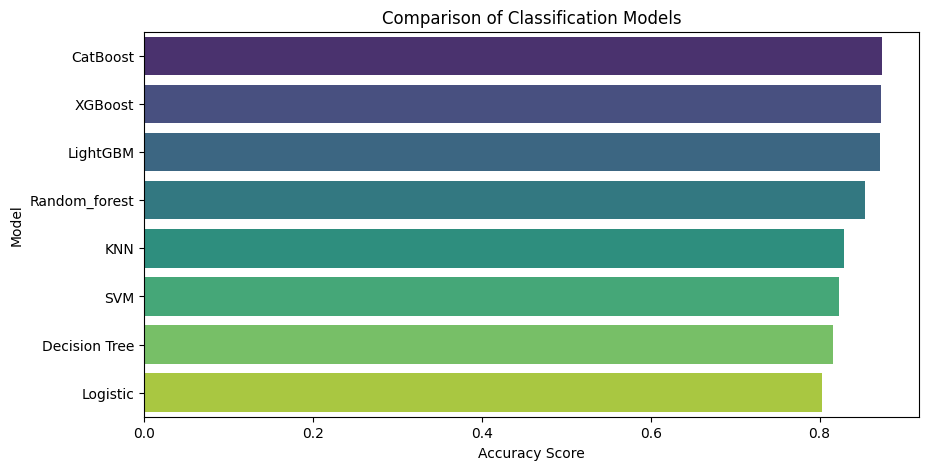

In [63]:
model_accuracies = {
    "Decision Tree": dt_accuracy,
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "XGBoost": xgb_accuracy,
    "CatBoost": cat_accuracy,
    "LightGBM": lgbm_accuracy,  
    "Logistic":logit_accuracy,
    "Random_forest":rf_accuracy
}

# Convert dictionary to a DataFrame for visualization
import pandas as pd
acc_df = pd.DataFrame(model_accuracies.items(), columns=["Model", "Accuracy"])

# Sort & Display
acc_df = acc_df.sort_values(by="Accuracy", ascending=False)
print(acc_df)

# Plot accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=acc_df["Accuracy"], y=acc_df["Model"], palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Comparison of Classification Models")
plt.show()


# Here we can chose the model catboost classifier model which provide 87% accuracy

In [65]:
X.head()

,Age,Work_Class,Education,Marital_status,Occupation,Relation_Family,Race,Sex,Capital_gain,Capital_loss,Work_Hr_week,Country
0,50,6,9,2,4,0,4,1,0,0,13,39
1,38,4,11,0,6,1,4,1,0,0,40,39
2,53,4,1,2,6,0,2,1,0,0,40,39
3,28,4,9,2,10,5,2,0,0,0,40,5
4,37,4,12,2,4,5,4,0,0,0,40,39


## Step 10: Model Prediction

In [67]:
new_data = [[35, 1, 10, 2, 1, 3, 1, 1,5000, 0, 40, 10]]  # Replace with actual values
prediction = model.predict(new_data)

if prediction[0] == 1:
    print("Predicted Income: >50K")
else:
    print("Predicted Income: <=50K")


Predicted Income: >50K


# Complete